<a href="https://colab.research.google.com/github/ishitaakolkar/van-goth/blob/main/Vibrant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade diffusers transformers torch accelerate pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.9/374.9 kB 25.8 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.34.0
    Uninstalling diffusers-0.34.0:
      Successfully uninstalled diffusers-0.34.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.55.2
    Uninstalling transformers-4.55.2:
      Successfully uninstalled transformers-4.55.2
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.10.0
    Uninstalling accelerate-1.10.0:
      Successfully uninstalled accelerate-1.10.0


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/761 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionInstructPix2PixPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--instruction-tuning-sd--cartoonizer/snapshots/94ae1467bb3a3b231cb444ab0acd4295836014f1/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--instruction-tuning-sd--cartoonizer/snapshots/94ae1467bb3a3b231cb444ab0acd4295836014f1/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--instruction-tuning-sd--cartoonizer/snapshots/94ae1467bb3a3b231cb444ab0acd4295836014f1/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--instruction-tuning-sd--cartoonizer/snapshots/94ae1467bb3a3b231cb444ab0acd4295836014f1/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Upload an image:


Saving WhatsApp Image 2025-08-08 at 16.27.34_17f5969f.jpg to WhatsApp Image 2025-08-08 at 16.27.34_17f5969f.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

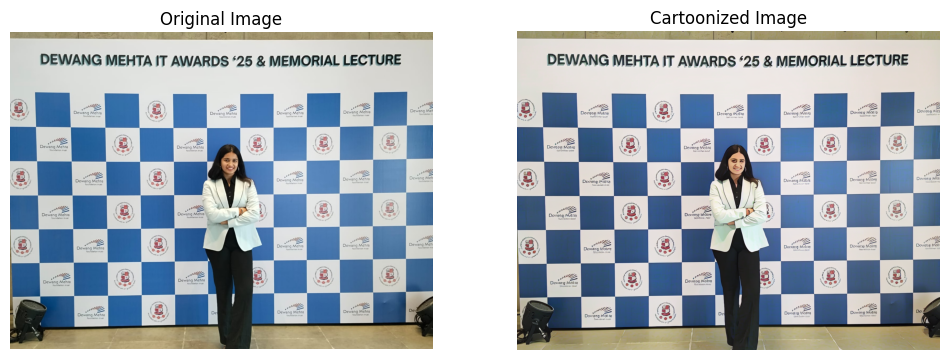

Cartoonized image saved as 'cartoonized_image.png'


In [ ]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline
from diffusers.utils import load_image
from google.colab import files
import os
from PIL import Image
from google.colab import userdata
import matplotlib.pyplot as plt

# Set your Hugging Face key automatically from your Colab secret (must be added as 'HUGGINGFACE_API_TOKEN')
access_token = userdata.get('HUGGINGFACE_API_TOKEN')
if not access_token:
    raise ValueError("Please set your Hugging Face token as 'HUGGINGFACE_API_TOKEN' in Colab secrets.")

model_id = "instruction-tuning-sd/cartoonizer"

# Load pipeline WITHOUT use_auth_token argument
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    "instruction-tuning-sd/cartoonizer",
    torch_dtype=torch.float16,
    use_auth_token=True  # or use your token with environment variable
).to("cuda")

print("Upload an image:")
uploaded = files.upload()
input_filename = next(iter(uploaded.keys()))
input_image = load_image(input_filename)

result = pipe("Cartoonize the following image", image=input_image).images[0]

output_file = "cartoonized_image.png"
result.save(output_file)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(input_image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Cartoonized Image")
plt.imshow(result)
plt.axis("off")

plt.show()

print(f"Cartoonized image saved as '{output_file}'")